In [59]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

KNOW YOUR DATASET

In [2]:
# how to load a dataset?
d = "https://raw.githubusercontent.com/naeljb/python/main/rawdata.csv"  # providing the dataset path
df = pd.read_csv(d)    # reading the csv file and saving as df 

In [3]:
# What are & how to view the first five rows?
df.head()

,id,program,recipient_name,sex,age,city,account_number,stage,vulnerability_level,hh_size,district,test_registration##recipient_link_key,household_status
0,16569637,test,Bunu,Female,25.0,lake worth,2016569637,selected,None,4,est,000019a4-be59-45e1-a957-0519a6ed4a0b,returnee
1,12065927,test,Musa,Female,41.0,ngomari ndolori,2012065927,selected,crisis,1,one,0001b8c4-c858-4f5c-b4c7-ad0dc0a6c156,idp
2,14282086,test,Umar,Male,24.0,miami,2014282086,selected,crisis,12,ouest,0004193c-1d0d-4763-9824-960c62b257b6,idp
3,17930547,test,ahim,Female,27.0,sabon gari 1,2017930547,selected,None,8,est,00045631-0146-4092-8772-432e03afa4af,idp
4,16910786,test,Kadi,Female,31.0,mushmiri gana,2016910786,selected,None,8,est,00046e52-0c96-493d-980b-06a9e9ee59d8,idp


In [4]:
# What are & how to view the last five rows?
df.tail()

,id,program,recipient_name,sex,age,city,account_number,stage,vulnerability_level,hh_size,district,test_registration##recipient_link_key,household_status
38327,13537708,test,Amma,Male,29.0,pap,2013537708,selected,crisis,4,ouest,fff49ee5-7031-4ee7-9ff2-68df4713cd5d,idp
38328,10773014,test,eman,Female,28.0,madinatu,2010773014,selected,crisis,4,ouest,fff7d0f6-f10f-43f9-8f61-d6480fcc8494,NaN
38329,10149401,test,idda,Male,25.0,cap,2010149401,selected,crisis,9,ouest,fffad480-7ed4-4549-8b7d-87c8194eb9b0,NaN
38330,11154224,test,muru,Female,32.0,cap dubai,2011154224,selected,crisis,4,one,fffbf9ab-aea6-4b60-98c2-811d92e584cf,NaN
38331,15749502,test,Musa,Female,22.0,dakar,2115749502,selected,None,7,est,fffedbe4-512a-4237-88bb-6c1a6fc88713,idp


In [5]:
# What is the dataset size (number of rows and columns)?
df.shape

(38332, 13)

In [6]:
# how to get & what are the columns name?
df.columns.values

array(['id', 'program', 'recipient_name', 'sex', 'age', 'city',
       'account_number', 'stage', 'vulnerability_level', 'hh_size',
       'district', 'test_registration##recipient_link_key',
       'household_status'], dtype=object)

In [7]:
# What are the columns data types?
df.dtypes

id                                         int64
program                                   object
recipient_name                            object
sex                                       object
age                                      float64
city                                      object
account_number                             int64
stage                                     object
vulnerability_level                       object
hh_size                                    int64
district                                  object
test_registration##recipient_link_key     object
household_status                          object
dtype: object

In [8]:
# What are the different value names in a column (ex: district column)?
df['district'].unique()

array(['est', 'one', 'ouest', 'zero', nan], dtype=object)

In [9]:
# Are there missing values in a column and how many?
df.isnull().sum()

id                                          0
program                                     0
recipient_name                              1
sex                                         1
age                                         1
city                                        2
account_number                              0
stage                                       0
vulnerability_level                         4
hh_size                                     0
district                                    2
test_registration##recipient_link_key     106
household_status                         5055
dtype: int64

SHAPE YOUR DATASET

In [10]:
# how to input datset directly?
d1 = {'c':[1,2,3,4,5,8,15,45,7,3],'b':[5,6,7,8,5,6,7,8,9,10],'income':[9,10,11,12,5,6,7,9,5,45]}
pre_test =pd.DataFrame(d1)
pre_test


,c,b,income
0,1,5,9
1,2,6,10
2,3,7,11
3,4,8,12
4,5,5,5
5,8,6,6
6,15,7,7
7,45,8,9
8,7,9,5
9,3,10,45


In [11]:
d2 = {'income':[1,2,3,4,7,9,6,45,5,12],'b':[5,6,7,8,89,5,74,90,22,11],'c':[9,10,11,12,1,6,7,8,9,11]}
post_test =pd.DataFrame(d2)
post_test

,income,b,c
0,1,5,9
1,2,6,10
2,3,7,11
3,4,8,12
4,7,89,1
5,9,5,6
6,6,74,7
7,45,90,8
8,5,22,9
9,12,11,11


In [12]:
# how to re-order the columns? 
pre_test=pre_test[['income','b','c']]
pre_test

,income,b,c
0,9,5,1
1,10,6,2
2,11,7,3
3,12,8,4
4,5,5,5
5,6,6,8
6,7,7,15
7,9,8,45
8,5,9,7
9,45,10,3


In [13]:
# how to append two datasets?
df3 = pd.concat([pre_test,post_test])
df3

,income,b,c
0,9,5,1
1,10,6,2
2,11,7,3
3,12,8,4
4,5,5,5
5,6,6,8
6,7,7,15
7,9,8,45
8,5,9,7
9,45,10,3


In [14]:
# how to drop columns?
df=df.drop(['program','test_registration##recipient_link_key'], axis=1)

In [15]:
# how to remove rows that met certain conditions? can be used for both sorting and cleaning 
#  ex: removing all people aged between 18-24 years old  in miami 
df =df[(df['age']>=18) & (df['age']<=24) & (df['city']!='miami')]

In [16]:
# how to rename columns?  
df.rename(columns={'recipient_name':'name','account_number':'account','vulnerability_level':'vulnerability','hh_size':'size','household_status':'status'},inplace=True)
df.head(2)

,id,name,sex,age,city,account,stage,vulnerability,size,district,status
8,15358786,ktar,Female,22.0,lagonav,2115358786,selected,None,4,est,host
13,11369273,iman,Female,20.0,cap dubai,2011369273,selected,crisis,3,one,NaN


TRANSFORM YOUR DATA

In [17]:
# How to replace missing values in a column by the mean ?
mean_age = df['age'].mean(axis=0)
mean_age

20.939679547596608

In [18]:
df['age'].replace(np.nan,mean_age,inplace =True)

In [19]:
# how to replace missing value in a column by the most frequent value in that column? 


In [20]:
df['district'].value_counts()

est      2031
ouest    1649
one      1499
zero      126
Name: district, dtype: int64

In [21]:
df['district'].value_counts().idxmax()

'est'

In [22]:
df['district'].replace(np.nan,'est',inplace =True)

In [23]:
# how to add a new column by applying an operation on another column? 
df['indirect_bene']=df['size']*5
df.head(2)

,id,name,sex,age,city,account,stage,vulnerability,size,district,status,indirect_bene
8,15358786,ktar,Female,22.0,lagonav,2115358786,selected,None,4,est,host,20
13,11369273,iman,Female,20.0,cap dubai,2011369273,selected,crisis,3,one,NaN,15


In [24]:
# how to add a new column with a single value 
df['beneficiaries'] = '1'
df.head(2)

,id,name,sex,age,city,account,stage,vulnerability,size,district,status,indirect_bene,beneficiaries
8,15358786,ktar,Female,22.0,lagonav,2115358786,selected,None,4,est,host,20,1
13,11369273,iman,Female,20.0,cap dubai,2011369273,selected,crisis,3,one,NaN,15,1


In [25]:
# how to create a new column with a single condition applied on another column (option 1)?
df['adulte']= df['age'].apply(lambda x: 'yes ' if x >18 else 'no')
df.head(2)

,id,name,sex,age,city,account,stage,vulnerability,size,district,status,indirect_bene,beneficiaries,adulte
8,15358786,ktar,Female,22.0,lagonav,2115358786,selected,None,4,est,host,20,1,yes
13,11369273,iman,Female,20.0,cap dubai,2011369273,selected,crisis,3,one,NaN,15,1,yes


In [26]:
# how to create a new column with a single condition applied on another column (option 2)?
def age_range(a):
    if a['age'] > 18:
        return 1
    else:
        return 0

df ['adulte1'] =df.apply(age_range,axis=1)
df.head(2)

,id,name,sex,age,city,account,stage,vulnerability,size,district,status,indirect_bene,beneficiaries,adulte,adulte1
8,15358786,ktar,Female,22.0,lagonav,2115358786,selected,None,4,est,host,20,1,yes,1
13,11369273,iman,Female,20.0,cap dubai,2011369273,selected,crisis,3,one,NaN,15,1,yes,1


In [27]:
# how to create a new column with multiple conditions applied to another column?
def age_range1(b):
    if b['age'] > 11 and b['age']<30:
        return 1
    else:
        return 0

df ['youth'] =df.apply(age_range1,axis=1)
df.head(2)

,id,name,sex,age,city,account,stage,vulnerability,size,district,status,indirect_bene,beneficiaries,adulte,adulte1,youth
8,15358786,ktar,Female,22.0,lagonav,2115358786,selected,None,4,est,host,20,1,yes,1,1
13,11369273,iman,Female,20.0,cap dubai,2011369273,selected,crisis,3,one,NaN,15,1,yes,1,1


In [46]:
# How to save my dataset with the Extracted, transformed into a directory? 
df.to_csv('C:/Users/Nael/Desktop/mydataset.csv') # saving as CSV file

ANALYZE YOUR DATA

In [28]:
# how to create a new column by changing the value labels of another column?
df['sex_num']=df.sex.map({'Female':0,'Male':1})
df.head(2)

,id,name,sex,age,city,account,stage,vulnerability,size,district,status,indirect_bene,beneficiaries,adulte,adulte1,youth,sex_num
8,15358786,ktar,Female,22.0,lagonav,2115358786,selected,None,4,est,host,20,1,yes,1,1,0
13,11369273,iman,Female,20.0,cap dubai,2011369273,selected,crisis,3,one,NaN,15,1,yes,1,1,0


In [29]:
# how to get the summary statistics?
df.describe()

,id,age,account,size,indirect_bene,adulte1,youth,sex_num
count,5.305000e+03,5305.00000,5.305000e+03,5305.000000,5305.000000,5305.000000,5305.0,5305.000000
mean,1.410694e+07,20.93968,2.027019e+09,4.030349,20.151744,0.932516,1.0,0.028841
std,2.334538e+06,1.63511,3.419604e+07,1.639222,8.196112,0.250881,0.0,0.167374
min,1.009702e+07,18.00000,2.010097e+09,1.000000,5.000000,0.000000,1.0,0.000000
25%,1.192256e+07,20.00000,2.011923e+09,3.000000,15.000000,1.000000,1.0,0.000000
50%,1.439082e+07,20.00000,2.014391e+09,4.000000,20.000000,1.000000,1.0,0.000000
75%,1.617679e+07,22.00000,2.016848e+09,5.000000,25.000000,1.000000,1.0,0.000000
max,2.016737e+07,24.00000,2.116007e+09,14.000000,70.000000,1.000000,1.0,1.000000


In [30]:
# how to get the upper and lower 95% intervall confidence values (option 1)?
n = df['age']. count() # counting number of values in the column
nsquart =math.sqrt(n)   # squar of n
mean = df['age'].mean()
std = df['age']. std()
z = stats.norm.ppf(q=0.975)
upper = mean +(z*(std/nsquart))
lower = mean -(z*(std/nsquart))
print(upper,lower)

20.98367952312403 20.895679572069184


In [31]:
# how to get the upper and lower 95% intervall confidence values (option 2)?
u_age = df['age'].mean() + (stats.norm.ppf(q=0.975)*(df['age']. std()/math.sqrt(df['age']. count())))
l_age = df['age'].mean() - (stats.norm.ppf(q=0.975)*(df['age']. std()/math.sqrt(df['age']. count())))
print (u_age,l_age)

20.98367952312403 20.895679572069184


In [32]:
# how to get the percentage of each value label in a column?
s = df['sex']
counts= s.value_counts()
percents=s.value_counts(normalize=True)
percents100= s.value_counts(normalize=True).mul(100).round(1).astype(str)+"%"
d2=({'#':counts,'percent':percents,'%':percents100})
sex1=pd.DataFrame(d2)
sex1

,#,percent,%
Female,5152,0.971159,97.1%
Male,153,0.028841,2.9%


In [73]:
# how to do a crosstable (count ) ?  
pd.crosstab(df['district'], df['sex'])

sex,Female,Male
district,,
est,1974,57
one,1466,33
ouest,1590,59
zero,122,4


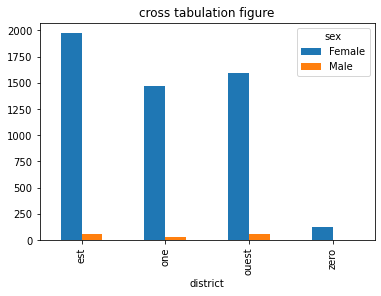

In [89]:
# How to do crosstable (count ) bar chart? 
pd.crosstab(df['district'], df['sex']).plot(kind = 'bar')
plt.title('cross tabulation figure')
plt.show()

In [75]:
pd.crosstab(df['district'], df['sex'], normalize ='all') #  (% over all value,normalize overall values )

sex,Female,Male
district,,
est,0.372102,0.010745
one,0.276343,0.006221
ouest,0.299717,0.011122
zero,0.022997,0.000754


In [76]:
pd.crosstab(df['district'], df['sex'], normalize ='index') #  (% or normalize over each row )

sex,Female,Male
district,,
est,0.971935,0.028065
one,0.977985,0.022015
ouest,0.964221,0.035779
zero,0.968254,0.031746


In [80]:
pd.crosstab(df['district'], df['sex'], normalize ='columns')  #  (% or normalize over each column )

sex,Female,Male
district,,
est,0.383152,0.372549
one,0.284550,0.215686
ouest,0.308618,0.385621
zero,0.023680,0.026144


In [33]:
# How to get the summary statistics of a sub-group
# here statiscts for "male" sub group of "sex" column

male_df = df[df['sex']=='Male']  # creating my sub groupe dataset of male
male_df.describe()

,id,age,account,size,indirect_bene,adulte1,youth,sex_num
count,1.530000e+02,153.000000,1.530000e+02,153.000000,153.000000,153.000000,153.0,153.0
mean,1.410892e+07,21.398693,2.024566e+09,4.738562,23.692810,0.967320,1.0,1.0
std,2.446506e+06,1.683276,3.130563e+07,2.123711,10.618554,0.178381,0.0,0.0
min,1.013078e+07,18.000000,2.010131e+09,1.000000,5.000000,0.000000,1.0,1.0
25%,1.174767e+07,20.000000,2.011748e+09,3.000000,15.000000,1.000000,1.0,1.0
50%,1.466892e+07,22.000000,2.014669e+09,4.000000,20.000000,1.000000,1.0,1.0
75%,1.633461e+07,23.000000,2.016608e+09,6.000000,30.000000,1.000000,1.0,1.0
max,1.816131e+07,24.000000,2.115999e+09,11.000000,55.000000,1.000000,1.0,1.0


In [34]:
# here statiscts for "female" group of "sex" column

female_df = df[df['sex'] == 'Female']
female_df.describe()

,id,age,account,size,indirect_bene,adulte1,youth,sex_num
count,5.152000e+03,5152.000000,5.152000e+03,5152.000000,5152.000000,5152.000000,5152.0,5152.0
mean,1.410688e+07,20.926048,2.027092e+09,4.009317,20.046584,0.931483,1.0,0.0
std,2.331379e+06,1.631853,3.427826e+07,1.618158,8.090788,0.252656,0.0,0.0
min,1.009702e+07,18.000000,2.010097e+09,1.000000,5.000000,0.000000,1.0,0.0
25%,1.193459e+07,20.000000,2.011935e+09,3.000000,15.000000,1.000000,1.0,0.0
50%,1.438219e+07,20.000000,2.014382e+09,4.000000,20.000000,1.000000,1.0,0.0
75%,1.616660e+07,22.000000,2.016853e+09,5.000000,25.000000,1.000000,1.0,0.0
max,2.016737e+07,24.000000,2.116007e+09,14.000000,70.000000,1.000000,1.0,0.0


In [35]:
# Are the means of two groups within a same variable/column satisticaly different?

In [36]:
from scipy.stats import ttest_ind

In [37]:
TwoTail = ttest_ind(male_df['age'],female_df['age'],equal_var = True)
TwoTail  # result nterpretation: if p-value less than 0.05, means are statistically different

Ttest_indResult(statistic=3.5273342582385983, pvalue=0.00042332017764340143)

In [38]:
# Are the means taken at two different times statistically different?

In [83]:
income_before = pre_test['income'] 


In [84]:
income_after = post_test['income']


In [41]:
from scipy.stats import ttest_rel

ttest_pair = ttest_rel(income_before,income_after)
ttest_pair

Ttest_relResult(statistic=0.4658025705334026, pvalue=0.6524236776514067)

In [42]:
deg_free =(len(income_before) + len(income_after)) - 1
deg_free

19

In [43]:
# Are there correlation among the variables? 
df.corr()

,id,age,account,size,indirect_bene,adulte1,youth,sex_num
id,1.000000,0.083631,0.313792,0.403025,0.403025,-0.001986,NaN,0.000146
age,0.083631,1.000000,0.017619,0.182797,0.182797,0.483687,NaN,0.048381
account,0.313792,0.017619,1.000000,0.074337,0.074337,0.024535,NaN,-0.012362
size,0.403025,0.182797,0.074337,1.000000,1.000000,0.069622,NaN,0.074460
indirect_bene,0.403025,0.182797,0.074337,1.000000,1.000000,0.069622,NaN,0.074460
adulte1,-0.001986,0.483687,0.024535,0.069622,0.069622,1.000000,NaN,0.023909
youth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex_num,0.000146,0.048381,-0.012362,0.074460,0.074460,0.023909,NaN,1.000000


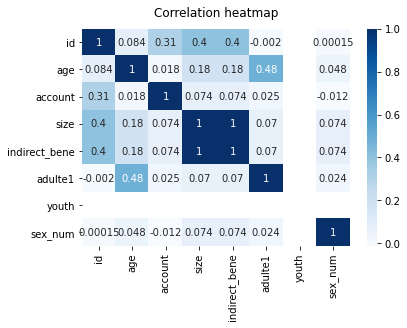

In [71]:
heatmap= sns.heatmap(df.corr(),cmap = 'Blues', annot = True)
heatmap.set_title('Correlation heatmap', pad =12)
plt.show()

In [44]:
# handling missing value

In [45]:
# change data type

In [ ]:
# box plot